**Homework 3**

Load the iris dataset:

In [1]:
import numpy as np
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y = iris.target 

Create a PCA class that is instantiated by specifying the number of desired components.

In [2]:
import matplotlib.pyplot as plt
mean = np.mean(X, axis=0)
centeredX= X - mean #Center the feature matrix about its mean (column-wise)
CVmatrix= (centeredX.T @ centeredX)/X.shape[0] #Create the CV matrix from centeredX
eigval, eigvec = np.linalg.eig(CVmatrix)

i = np.argsort(eigval)[::-1][:2]
eigvec[i]
# eigvec
np.argsort(eigval)[-2:] 

mean = np.mean(X, axis=0)
centeredX= X - mean #Center the feature matrix about its mean (column-wise)

CVmatrix= (centeredX.T @ centeredX)/X.shape[0] #Create the CV matrix from centeredX
eigvals,eigvecs= np.linalg.eig(CVmatrix) #Compute the eigenvals and eigenvecs of CVmatrix
#You may need more code here...

n_eigvec_indices = np.argsort(eigval)[:2] # argsort based on the eigval

#Create a basis from the eigenvecs with the largest corresponding eigenvals:
basis= eigvecs[:, n_eigvec_indices]

basis.shape
(X.T @ X).shape

fX = X.T @ X
# fX @ basis
# basis @ fX
print(X.shape, basis.shape)

(150, 4) (4, 2)


In [7]:
class PCA():
  def __init__(self,n_components):
    self.n_components=n_components

  def fit(self,X):
    mean = np.mean(X, axis=0)
    centeredX= X - mean #Center the feature matrix about its mean (column-wise)
    CVmatrix= (centeredX.T @ centeredX)/X.shape[0] #Create the CV matrix from centeredX
    eigvals,eigvecs= np.linalg.eig(CVmatrix) #Compute the eigenvals and eigenvecs of CVmatrix
    #You may need more code here...

    n_eigvec_indices = np.argsort(eigvals)[::-1][:self.n_components] # argsort based on the eigval

    #Create a basis from the eigenvecs with the largest corresponding eigenvals:
    self.basis= eigvecs[:, n_eigvec_indices]

  def transform(self,X):
    mean = np.mean(X, axis = 0)
    centeredX = X - mean
    return  centeredX @ self.basis#Project X onto the basis created by the fit method
  def fit_transform(self,X):
    self.fit(X)
    return self.transform(X) #Combines the fit method and the transform method for convenience


The following code block loads the  `iris` dataset and applies a `PCA` object with 2 components.

In [8]:
from sklearn.datasets import load_iris

iris=load_iris()
X=iris.data
y=iris.target

pca=PCA(n_components=2)
projectedX=pca.fit_transform(X)

In [9]:
projectedX

array([[-2.68412563, -0.31939725],
       [-2.71414169,  0.17700123],
       [-2.88899057,  0.14494943],
       [-2.74534286,  0.31829898],
       [-2.72871654, -0.32675451],
       [-2.28085963, -0.74133045],
       [-2.82053775,  0.08946138],
       [-2.62614497, -0.16338496],
       [-2.88638273,  0.57831175],
       [-2.6727558 ,  0.11377425],
       [-2.50694709, -0.6450689 ],
       [-2.61275523, -0.01472994],
       [-2.78610927,  0.235112  ],
       [-3.22380374,  0.51139459],
       [-2.64475039, -1.17876464],
       [-2.38603903, -1.33806233],
       [-2.62352788, -0.81067951],
       [-2.64829671, -0.31184914],
       [-2.19982032, -0.87283904],
       [-2.5879864 , -0.51356031],
       [-2.31025622, -0.39134594],
       [-2.54370523, -0.43299606],
       [-3.21593942, -0.13346807],
       [-2.30273318, -0.09870885],
       [-2.35575405,  0.03728186],
       [-2.50666891,  0.14601688],
       [-2.46882007, -0.13095149],
       [-2.56231991, -0.36771886],
       [-2.63953472,

Run this code block to visualize your projection! Note that the color of each point comes from the species, allowing you to see to what extent those points form distinct clusters.

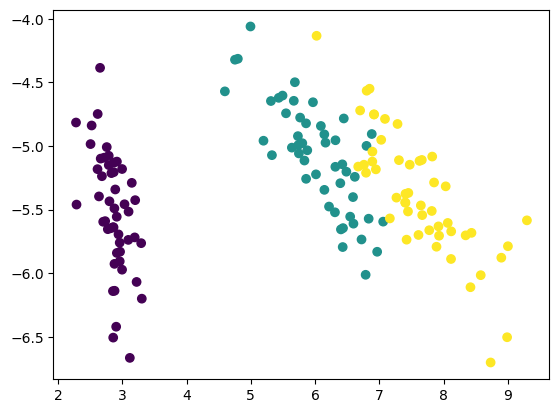

In [9]:
import matplotlib.pyplot as plt

plt.scatter(projectedX[:,0],projectedX[:,1],c=y)